## **Cleveland Heart Disease dataset (UCI Repository) — Exploratory Data Analysis**

**About Dataset:**

Data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The “target” field refers to the presence of heart disease in the patient. It is integer valued 0 = disease and 1 = no disease.

---

Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha ‘@’ ics.uci.edu) (714) 856–8779

---

Check UCI Machine Learning Repository for more heart Disease dataset.

**Importing some necessary libraries for Data Analysis:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style(style="darkgrid")
plt.style.use("bmh")

**Loading Dataset into Dataframe:**

In [2]:
dataframe = pd.read_csv("../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")
dataframe.rename(columns={'condition':'target'}, inplace = True)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


**Attribute Information:**

---



1. age: age in years

2. sex: 1 = male; 0 = female

3. cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
---

*Note that it’s quite an old dataset (1988)*

### **Exploratory Data Analysis:**

1. **Checking missing and null values**

In [3]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
dataframe.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*This dataset looks perfect to use as we don’t have null as well as missing values.*

In [5]:
pd.set_option("display.float", "{:.2f}".format)
dfx = dataframe.drop(columns=["sex","target"])
dfx.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,2.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,0.60,0.68,0.84
std,9.05,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,0.96
min,29.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,2.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,0.00,0.00,0.00
50%,56.00,2.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,0.00
75%,61.00,3.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,1.00,1.00,2.00
max,77.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,2.00


2. No. of people with heart disease vs No. of people without heart disease

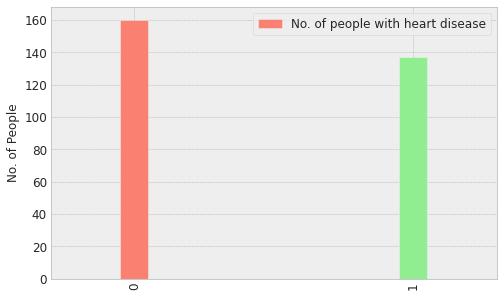

In [6]:
dataframe.target.value_counts().plot(kind="bar",width=0.1,color=["salmon","lightgreen"],legend=1,figsize=(8,5))
plt.ylabel("No. of People", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["No. of people with heart disease"],fontsize=12);
plt.show()

- *We have 165 people with heart disease and 138 people without heart disease, so our problem is balanced.*

3. **CORRELAION MATRIX HEATMAP**

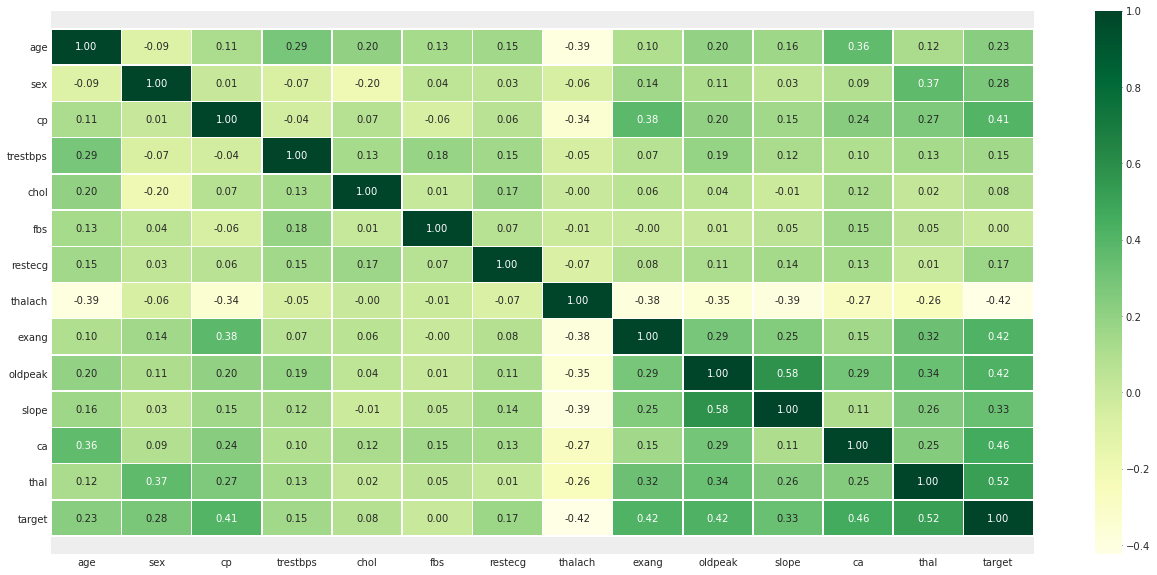

In [7]:
corr_matrix = dataframe.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

4. **CORRELATION WITH TARGET**

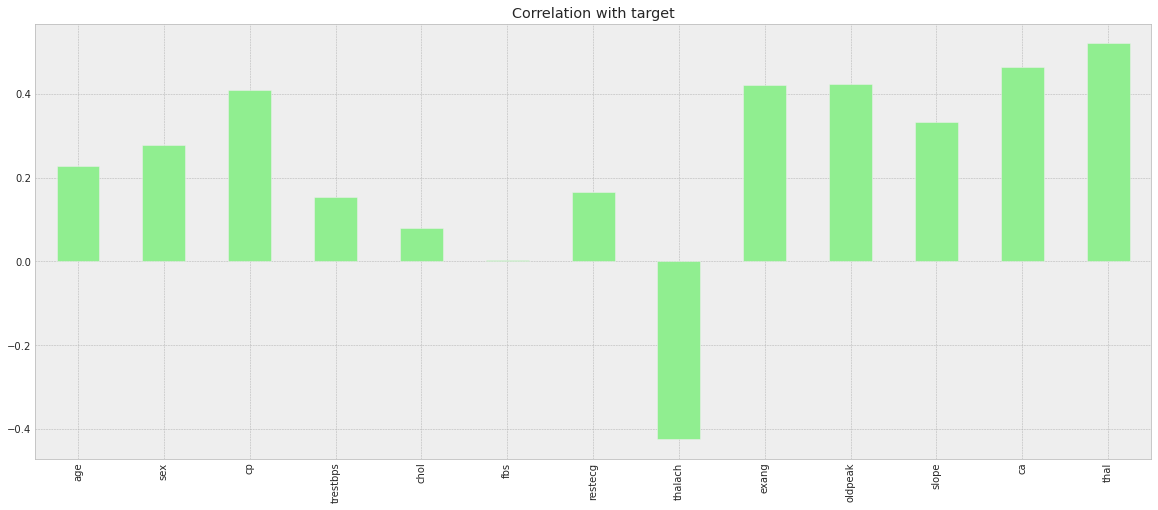

In [8]:
dataframe.drop('target', axis=1).corrwith(dataframe.target).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="lightgreen");

---
***Observations from correlation:***
- *fbs and chol are the least correlated with the target variable.*
- *All other variables have a significant correlation with the target variable.*
---



Categorical and Continous Values:

In [9]:
categorical_val = []
continous_val = []
for column in dataframe.columns:
    print('-------------------------------')
    print(f"{column} : {dataframe[column].unique()}")
    if len(dataframe[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

-------------------------------
age : [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
-------------------------------
sex : [1 0]
-------------------------------
cp : [0 1 2 3]
-------------------------------
trestbps : [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
-------------------------------
chol : [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 

5. Categorical Values Histogram

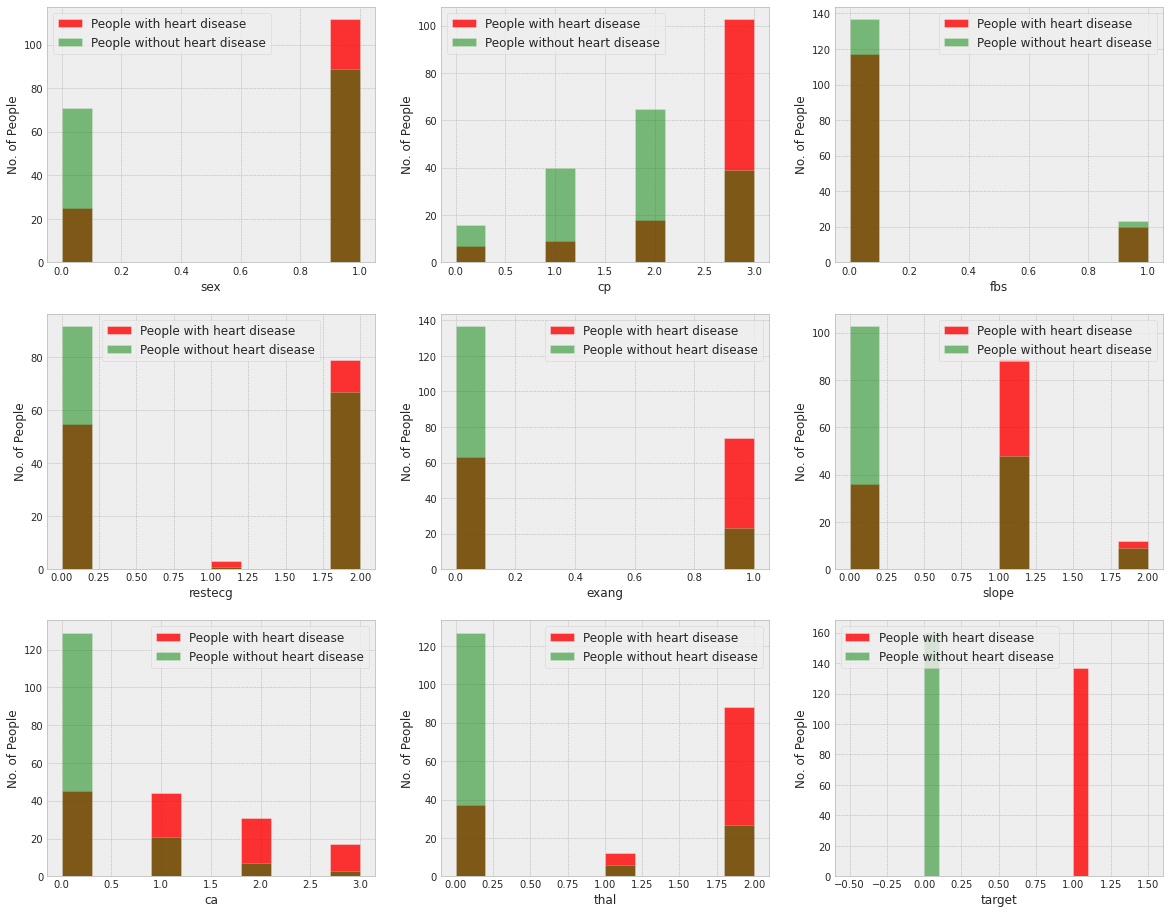

In [10]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    dataframe[dataframe["target"] == 1][column].hist(bins=10, color='red', label='People with heart disease',alpha=0.8)
    dataframe[dataframe["target"] == 0][column].hist(bins=10, color='green', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

---
***Observations from the above plot:***

- **cp {Chest pain}**: *People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.*
- **restecg {resting EKG results}**: *People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.*
- **exang {exercise-induced angina}**: *People with a value of 0 (No - angina induced by exercise) have more heart disease than people with a value of 1 (Yes - angina induced by exercise)*
- **slope {the slope of the ST segment of peak exercise}**: *People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).*
- **ca {number of major vessels (0-3) stained by fluoroscopy}**: *The more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.*
- **thal {thalium stress result}**: *People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.*
---

6. **Continous Values Histogram:**

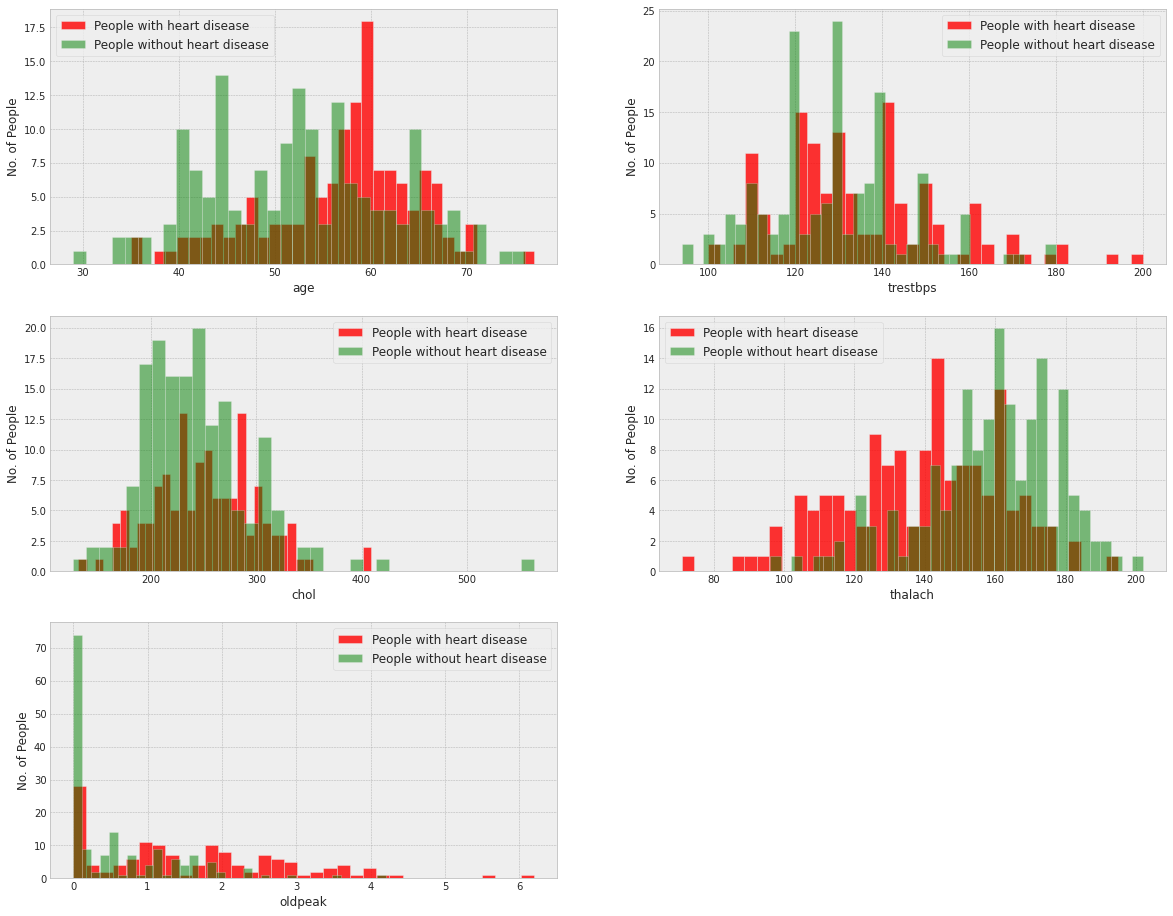

In [11]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    dataframe[dataframe["target"] == 1][column].hist(bins=35, color='red', label='People with heart disease', alpha=0.8)
    dataframe[dataframe["target"] == 0][column].hist(bins=35, color='green', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

---
***Observations from the above plot:***
- **trestbps**: *resting blood pressure anything above 120-140 is generally of concern.*
- **chol**: *greater than 200 is of concern.*
- **thalach**: *People with a maximum heart rate of over 140 are more likely to have heart disease.*
- *the **old peak** of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.*
---



7. **SCATTER PLOT (Age Vs Max Heart Rate)**

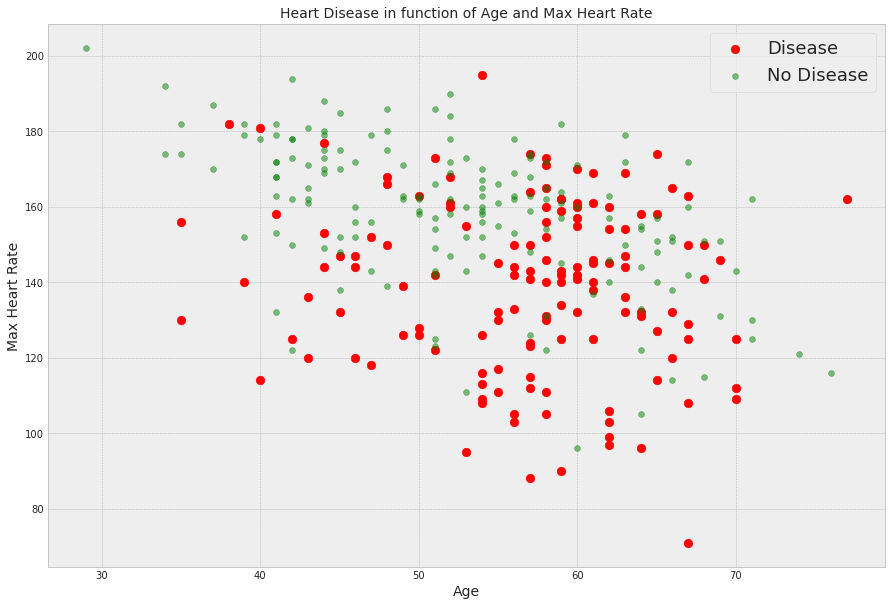

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(dataframe.age[dataframe.target==1],dataframe.thalach[dataframe.target==1],c="red",s=75)
plt.scatter(dataframe.age[dataframe.target==0],dataframe.thalach[dataframe.target==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Max Heart Rate",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Max Heart Rate", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

**Observation from above plot:**

This data isn't correlated at all so it is of no use to us.

8. **SCATTER PLOT (Age Vs Serum Cholestoral(mg/dl))**

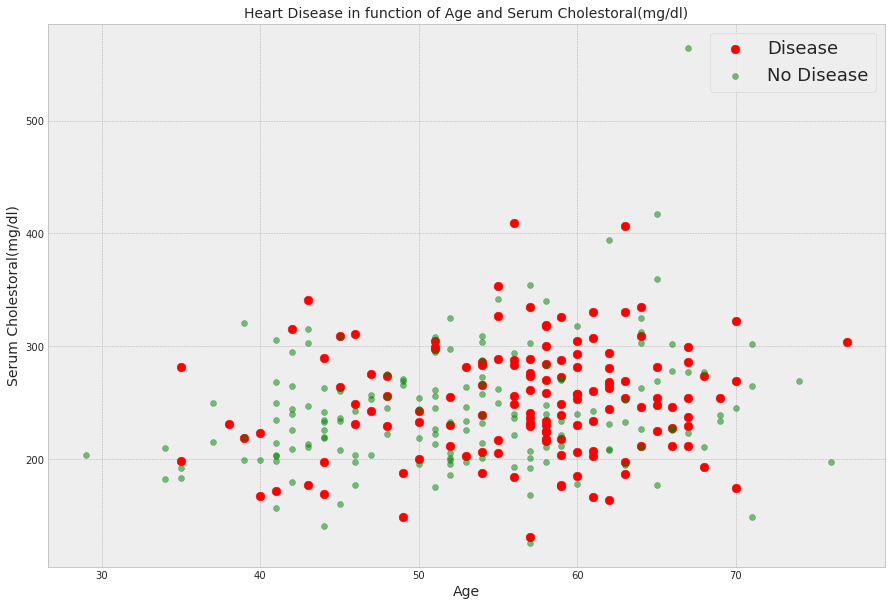

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(dataframe.age[dataframe.target==1],dataframe.chol[dataframe.target==1],c="red",s=75)
plt.scatter(dataframe.age[dataframe.target==0],dataframe.chol[dataframe.target==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Serum Cholestoral(mg/dl)",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Serum Cholestoral(mg/dl)", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

9. **SCATTER PLOT (Age Vs Resting Blood Pressure)**

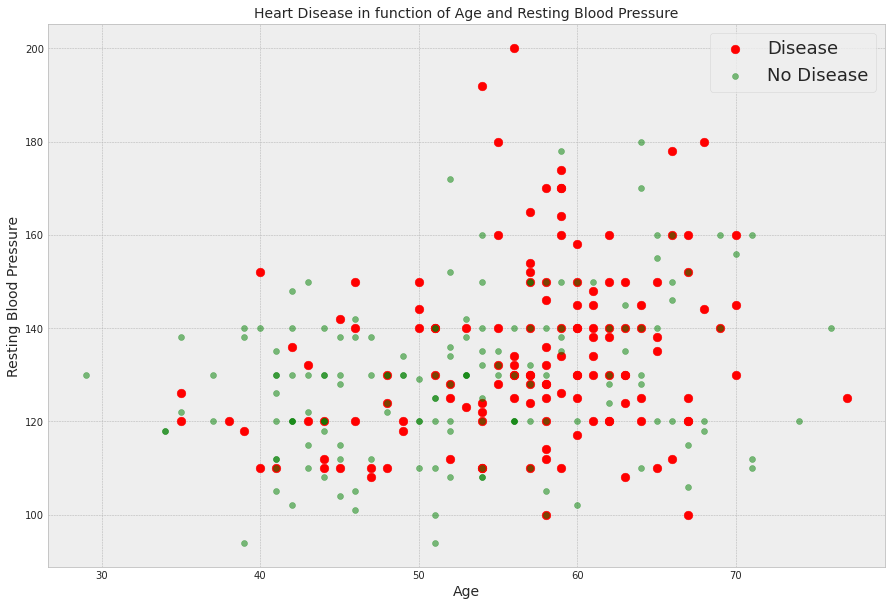

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(dataframe.age[dataframe.target==1],dataframe.trestbps[dataframe.target==1],c="red",s=75)
plt.scatter(dataframe.age[dataframe.target==0],dataframe.trestbps[dataframe.target==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Resting Blood Pressure",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Resting Blood Pressure", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

**OBSERVATION from above plots(8 & 9):**

Both Resting Blood Pressure and Serum Cholesterol shows a bit positive correlation but not that much. Also, Resting Blood Pressure and Serum Cholesterol have few Outliers which we will remove in preprocessing steps.

---


*Note: dataset also contains outliers*

*For further use of this dataset, outliers must be removed while dealing with model to get better results*


---